In [2]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm

import scipy
from math import sqrt,pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2 as cv
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
import os
 

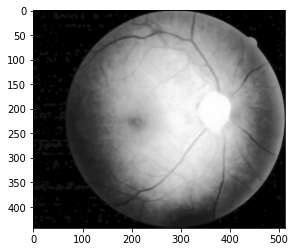

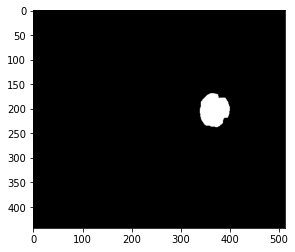

True

In [3]:
  
    img_pt ="/home/chakour/Bureau/Code Mehdi/disque_optique/21703_right.jpeg"
    
    image = cv.imread(img_pt)

    hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV) # convert BGR to HSV
    hue,sat,val = cv.split(hsv)       # extraire les 3 plan de couleur H S V 
    equalized=cv.equalizeHist(val)    # Egalisation adaptative d'histogramme
    median = cv.medianBlur(equalized, 5)  #filtre mediane de taille 5*5
    image = cv.cvtColor(median,cv.COLOR_BGR2RGB) # convert to RGB

    plt.imshow(image)   # prétraitement
    plt.show()
    ##########################  Homogénéisation de la région papillaire
    kernal = np.ones((5,5),np.uint8)
    closing = cv.morphologyEx(median, cv.MORPH_CLOSE, kernal) # fermeture morphologique avec kernel rectangle
    
    #########################c Extraction de la région papillaire
    _, thresh1 = cv.threshold(closing, 251, 255, cv.THRESH_BINARY) # seuillage de base 
    
    kernel = np.ones((3,3),np.uint8)
    thresh1 = cv.dilate(thresh1,kernel,iterations=3) #applique une dilataion 3 fois successif
    
    #########################  Extraction du disque optique par contour actif ###########################
    
    contours, hierarchy = cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) #contour actif géometrique
    #print("Number of contours = " + str(len(contours)))
    #print(contours[0])

    cv.drawContours(image, contours, -1, (0, 255, 0), 1)
    cv.drawContours(thresh1, contours, -1, (0, 255, 0), 1)
    #image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    thresh2 = cv.cvtColor(thresh1,cv.COLOR_BGR2RGB)

    #plt.imshow(image)
    #plt.show()
    plt.imshow(thresh2)
    plt.show()
    
    img_op ="disque_optique.jpeg"
   
    cv.imwrite(img_op,thresh1)


21043_left.jpeg


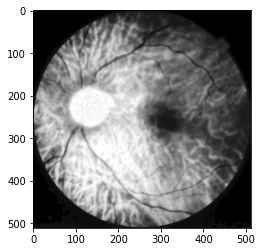

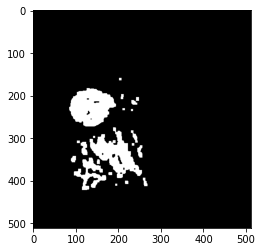

21260_left.jpeg


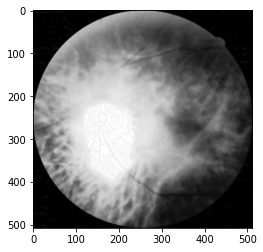

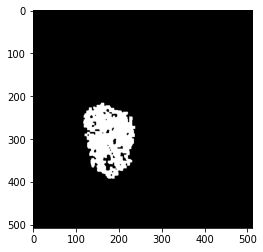

result_disque_optique22587_left.jpeg


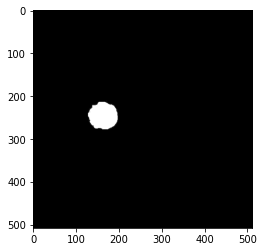

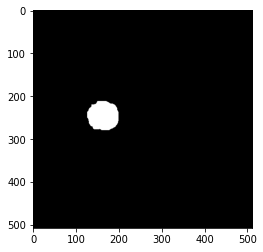

result_disque_optique22360_right.jpeg


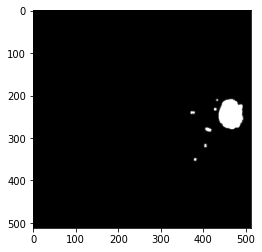

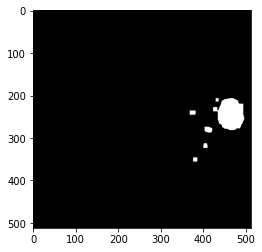

2081_right.jpeg


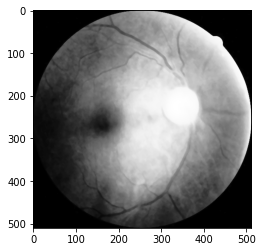

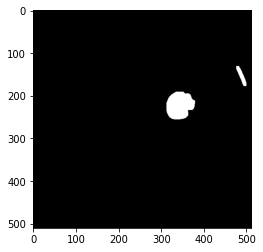

22043_left.jpeg


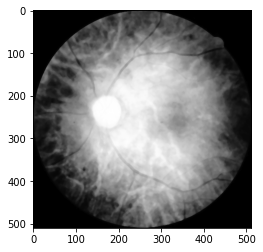

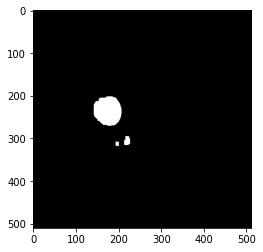

21383_left.jpeg


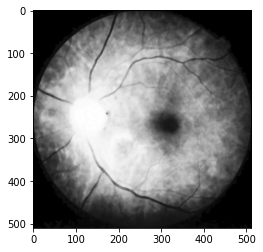

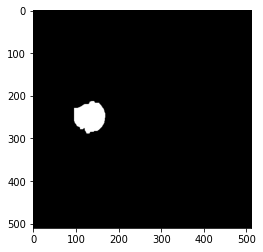

22587_left.jpeg


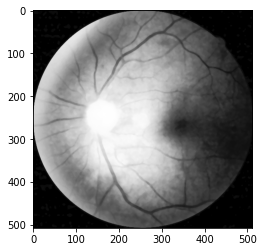

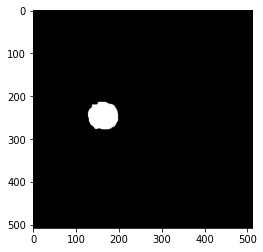

result_disque_optique21043_left.jpeg


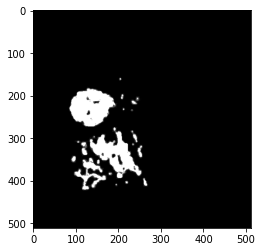

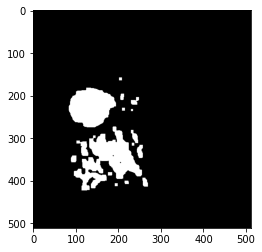

22360_right.jpeg


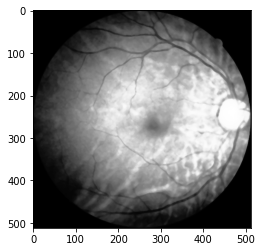

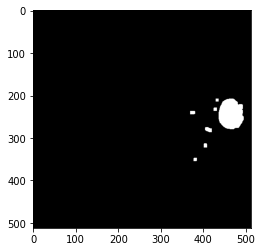

21022_left.jpeg


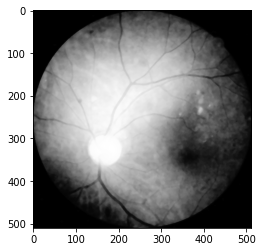

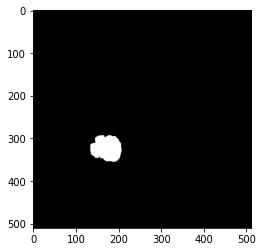

2081_left.jpeg


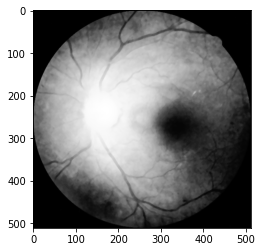

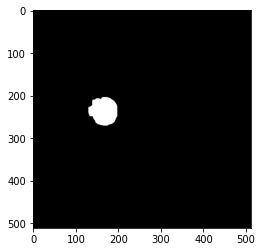

21504_right.jpeg


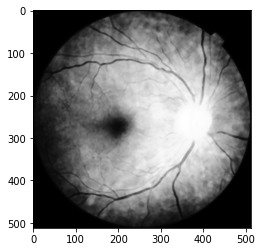

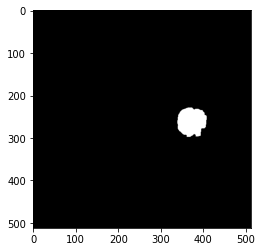

result_disque_optique


error: OpenCV(4.2.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [6]:
path = "/home/chakour/Bureau/Code Mehdi/disque_optique/"
 
files = os.listdir(path)
for name in files:
    print(name)
    
    img_pt ="/home/chakour/Bureau/Code Mehdi/disque_optique/"+ name
    
    image = cv.imread(img_pt)

    hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV) # convert BGR to HSV
    hue,sat,val = cv.split(hsv)       # extraire les 3 plan de couleur H S V 
    equalized=cv.equalizeHist(val)    # Egalisation adaptative d'histogramme
    median = cv.medianBlur(equalized, 5)  #filtre mediane de taille 5*5
    image = cv.cvtColor(median,cv.COLOR_BGR2RGB) # convert to RGB

    plt.imshow(image)   # prétraitement
    plt.show()
    ##########################  Homogénéisation de la région papillaire
    kernal = np.ones((5,5),np.uint8)
    closing = cv.morphologyEx(median, cv.MORPH_CLOSE, kernal) # fermeture morphologique avec kernel rectangle
    
    #########################c Extraction de la région papillaire
    _, thresh1 = cv.threshold(closing, 251, 255, cv.THRESH_BINARY) # seuillage de base 
    
    kernel = np.ones((3,3),np.uint8)
    thresh1 = cv.dilate(thresh1,kernel,iterations=3) #applique une dilataion 3 fois successif
    
    #########################  Extraction du disque optique par contour actif ###########################
    
    contours, hierarchy = cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) #contour actif géometrique
    #print("Number of contours = " + str(len(contours)))
    #print(contours[0])

    cv.drawContours(image, contours, -1, (0, 255, 0), 1)
    cv.drawContours(thresh1, contours, -1, (0, 255, 0), 1)
    #image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    thresh2 = cv.cvtColor(thresh1,cv.COLOR_BGR2RGB)

    #plt.imshow(image)
    #plt.show()
    plt.imshow(thresh2)
    plt.show()
    
    img_op ="/home/chakour/Bureau/Code Mehdi/disque_optique/result_disque_optique/" + name
   
    cv.imwrite(img_op,thresh1)
